### Using all 8 stations with a P record from 2005-2016: 
### Fisera Ridge, Upper Clearing, Hay Meadow
### Kananaskis, Bow Valley, Kananaskis Pocaterra, Banff CS, Wildcat Hills
### Remove days with P<1mm
### Plot histograms and best fit probability distributions for wet days

In [179]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn' this removes the warning when renaming columns
import math
from scipy import stats
from sklearn.linear_model import LinearRegression
import scipy
# import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

### Read in daily precip data for all stations, remove P<1mm and group by month

### Fisera Ridge 2325 m

In [222]:
FRPdaily_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\FRdailyprecip.csv", 
                            header=None, names= ["date", "FR_daily_p_mm"])
# change date column to datetime format
FRPdaily_df['date'] =  pd.to_datetime(FRPdaily_df['date'], format='%Y-%m-%d')
# set date index
FRPdaily_df.set_index("date", inplace=True)
# drop P values less than 1.0mm
FRPdaily_df = FRPdaily_df.drop(FRPdaily_df[FRPdaily_df.FR_daily_p_mm < 1.0].index)
# FRPdaily_df

### Group by month (Oct to Sep)

In [230]:
FRPoct_df = FRPdaily_df[FRPdaily_df.index.month == 10]
FRPoct_df.rename(columns={'FR_daily_p_mm': 'FR_dailyoct_p_mm'}, inplace=True)
FRPnov_df = FRPdaily_df[FRPdaily_df.index.month == 11]
FRPnov_df.rename(columns={'FR_daily_p_mm': 'FR_dailynov_p_mm'}, inplace=True)
FRPdec_df = FRPdaily_df[FRPdaily_df.index.month == 12]
FRPdec_df.rename(columns={'FR_daily_p_mm': 'FR_dailydec_p_mm'}, inplace=True)
FRPjan_df = FRPdaily_df[FRPdaily_df.index.month == 1]
FRPjan_df.rename(columns={'FR_daily_p_mm': 'FR_dailyjan_p_mm'}, inplace=True)
FRPfeb_df = FRPdaily_df[FRPdaily_df.index.month == 2]
FRPfeb_df.rename(columns={'FR_daily_p_mm': 'FR_dailyfeb_p_mm'}, inplace=True)
FRPmar_df = FRPdaily_df[FRPdaily_df.index.month == 3]
FRPmar_df.rename(columns={'FR_daily_p_mm': 'FR_dailymar_p_mm'}, inplace=True)
FRPapr_df = FRPdaily_df[FRPdaily_df.index.month == 4]
FRPapr_df.rename(columns={'FR_daily_p_mm': 'FR_dailyapr_p_mm'}, inplace=True)
FRPmay_df = FRPdaily_df[FRPdaily_df.index.month == 5]
FRPmay_df.rename(columns={'FR_daily_p_mm': 'FR_dailymay_p_mm'}, inplace=True)
FRPjun_df = FRPdaily_df[FRPdaily_df.index.month == 6]
FRPjun_df.rename(columns={'FR_daily_p_mm': 'FR_dailyjun_p_mm'}, inplace=True)
FRPjul_df = FRPdaily_df[FRPdaily_df.index.month == 7]
FRPjul_df.rename(columns={'FR_daily_p_mm': 'FR_dailyjul_p_mm'}, inplace=True)
FRPaug_df = FRPdaily_df[FRPdaily_df.index.month == 8]
FRPaug_df.rename(columns={'FR_daily_p_mm': 'FR_dailyaug_p_mm'}, inplace=True)
FRPsep_df = FRPdaily_df[FRPdaily_df.index.month == 9]
FRPsep_df.rename(columns={'FR_daily_p_mm': 'FR_dailysep_p_mm'}, inplace=True)
# FRPoct_df

### Concatenate to get seasonal data (DJF, MAM, JJA, SON)

In [231]:
FRPdjf_df = pd.concat([FRPdec_df, FRPjan_df, FRPfeb_df], axis=1, join="outer")
FRPdjf_df['FR_winter_p_mm'] = FRPdjf_df.sum(axis=1)
FRPmam_df = pd.concat([FRPmar_df, FRPapr_df, FRPmay_df], axis=1, join="outer")
FRPmam_df['FR_spring_p_mm'] = FRPmam_df.sum(axis=1)
FRPjja_df = pd.concat([FRPjun_df, FRPjul_df, FRPaug_df], axis=1, join="outer")
FRPjja_df['FR_summer_p_mm'] = FRPjja_df.sum(axis=1)
FRPson_df = pd.concat([FRPsep_df, FRPoct_df, FRPnov_df], axis=1, join="outer")
FRPson_df['FR_autumn_p_mm'] = FRPson_df.sum(axis=1)
FRPdjf_df

,FR_dailydec_p_mm,FR_dailyjan_p_mm,FR_dailyfeb_p_mm,FR_winter_p_mm
date,,,,
2005-12-01,1.4347,NaN,NaN,1.4347
2005-12-02,1.7503,NaN,NaN,1.7503
2005-12-05,6.4685,NaN,NaN,6.4685
2005-12-13,10.7015,NaN,NaN,10.7015
2005-12-20,1.6655,NaN,NaN,1.6655
...,...,...,...,...
2016-02-15,NaN,NaN,6.0967,6.0967
2016-02-16,NaN,NaN,1.8736,1.8736
2016-02-18,NaN,NaN,6.4137,6.4137


### Upper Clearing 1845 m

In [130]:
UCPdaily_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\UCdailyprecip.csv", 
                            header=None, names= ["date", "UC_daily_p_mm"])
# change date column to datetime format
UCPdaily_df['date'] =  pd.to_datetime(UCPdaily_df['date'], format='%Y-%m-%d')
# set date index
UCPdaily_df.set_index("date", inplace=True)
# drop P values less than 1.0mm
UCPdaily_df = UCPdaily_df.drop(UCPdaily_df[UCPdaily_df.UC_daily_p_mm < 1.0].index)
# UCPdaily_df

### Group by month (Oct to Sep)

In [207]:
UCPoct_df = UCPdaily_df[UCPdaily_df.index.month == 10]
UCPoct_df.rename(columns={'UC_daily_p_mm': 'UC_dailyoct_p_mm'}, inplace=True)
UCPnov_df = UCPdaily_df[UCPdaily_df.index.month == 11]
UCPnov_df.rename(columns={'UC_daily_p_mm': 'UC_dailynov_p_mm'}, inplace=True)
UCPdec_df = UCPdaily_df[UCPdaily_df.index.month == 12]
UCPdec_df.rename(columns={'UC_daily_p_mm': 'UC_dailydec_p_mm'}, inplace=True)
UCPjan_df = UCPdaily_df[UCPdaily_df.index.month == 1]
UCPjan_df.rename(columns={'UC_daily_p_mm': 'UC_dailyjan_p_mm'}, inplace=True)
UCPfeb_df = UCPdaily_df[UCPdaily_df.index.month == 2]
UCPfeb_df.rename(columns={'UC_daily_p_mm': 'UC_dailyfeb_p_mm'}, inplace=True)
UCPmar_df = UCPdaily_df[UCPdaily_df.index.month == 3]
UCPmar_df.rename(columns={'UC_daily_p_mm': 'UC_dailymar_p_mm'}, inplace=True)
UCPapr_df = UCPdaily_df[UCPdaily_df.index.month == 4]
UCPapr_df.rename(columns={'UC_daily_p_mm': 'UC_dailyapr_p_mm'}, inplace=True)
UCPmay_df = UCPdaily_df[UCPdaily_df.index.month == 5]
UCPmay_df.rename(columns={'UC_daily_p_mm': 'UC_dailymay_p_mm'}, inplace=True)
UCPjun_df = UCPdaily_df[UCPdaily_df.index.month == 6]
UCPjun_df.rename(columns={'UC_daily_p_mm': 'UC_dailyjun_p_mm'}, inplace=True)
UCPjul_df = UCPdaily_df[UCPdaily_df.index.month == 7]
UCPjul_df.rename(columns={'UC_daily_p_mm': 'UC_dailyjul_p_mm'}, inplace=True)
UCPaug_df = UCPdaily_df[UCPdaily_df.index.month == 8]
UCPaug_df.rename(columns={'UC_daily_p_mm': 'UC_dailyaug_p_mm'}, inplace=True)
UCPsep_df = UCPdaily_df[UCPdaily_df.index.month == 9]
UCPsep_df.rename(columns={'UC_daily_p_mm': 'UC_dailysep_p_mm'}, inplace=True)
# UCPoct_df

### Concatenate to get seasonal data (DJF, MAM, JJA, SON)

In [208]:
UCPdjf_df = pd.concat([UCPdec_df, UCPjan_df, UCPfeb_df], axis=1, join="outer")
UCPdjf_df['UC_winter_p_mm'] = UCPdjf_df.sum(axis=1)
UCPmam_df = pd.concat([UCPmar_df, UCPapr_df, UCPmay_df], axis=1, join="outer")
UCPmam_df['UC_spring_p_mm'] = UCPmam_df.sum(axis=1)
UCPjja_df = pd.concat([UCPjun_df, UCPjul_df, UCPaug_df], axis=1, join="outer")
UCPjja_df['UC_summer_p_mm'] = UCPjja_df.sum(axis=1)
UCPson_df = pd.concat([UCPsep_df, UCPoct_df, UCPnov_df], axis=1, join="outer")
UCPson_df['UC_autumn_p_mm'] = UCPson_df.sum(axis=1)
# UCPdjf_df

### Hay Meadow 1436 m

In [209]:
HMPdaily_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\HMdailyprecip.csv", 
                            header=None, names= ["date", "HM_daily_p_mm"])
# change date column from object to datetime format
HMPdaily_df['date'] =  pd.to_datetime(HMPdaily_df['date'], format='%Y-%m-%d')
# set date index
HMPdaily_df.set_index("date", inplace=True)
# drop P values less than 1.0mm
HMPdaily_df = HMPdaily_df.drop(HMPdaily_df[HMPdaily_df.HM_daily_p_mm < 1.0].index)
# HMPdaily_df

### Group by month (Oct to Sep)

In [211]:
HMPoct_df = HMPdaily_df[HMPdaily_df.index.month == 10]
HMPoct_df.rename(columns={'HM_daily_p_mm': 'HM_dailyoct_p_mm'}, inplace=True)
HMPnov_df = HMPdaily_df[HMPdaily_df.index.month == 11]
HMPnov_df.rename(columns={'HM_daily_p_mm': 'HM_dailynov_p_mm'}, inplace=True)
HMPdec_df = HMPdaily_df[HMPdaily_df.index.month == 12]
HMPdec_df.rename(columns={'HM_daily_p_mm': 'HM_dailydec_p_mm'}, inplace=True)
HMPjan_df = HMPdaily_df[HMPdaily_df.index.month == 1]
HMPjan_df.rename(columns={'HM_daily_p_mm': 'HM_dailyjan_p_mm'}, inplace=True)
HMPfeb_df = HMPdaily_df[HMPdaily_df.index.month == 2]
HMPfeb_df.rename(columns={'HM_daily_p_mm': 'HM_dailyfeb_p_mm'}, inplace=True)
HMPmar_df = HMPdaily_df[HMPdaily_df.index.month == 3]
HMPmar_df.rename(columns={'HM_daily_p_mm': 'HM_dailymar_p_mm'}, inplace=True)
HMPapr_df = HMPdaily_df[HMPdaily_df.index.month == 4]
HMPapr_df.rename(columns={'HM_daily_p_mm': 'HM_dailyapr_p_mm'}, inplace=True)
HMPmay_df = HMPdaily_df[HMPdaily_df.index.month == 5]
HMPmay_df.rename(columns={'HM_daily_p_mm': 'HM_dailymay_p_mm'}, inplace=True)
HMPjun_df = HMPdaily_df[HMPdaily_df.index.month == 6]
HMPjun_df.rename(columns={'HM_daily_p_mm': 'HM_dailyjun_p_mm'}, inplace=True)
HMPjul_df = HMPdaily_df[HMPdaily_df.index.month == 7]
HMPjul_df.rename(columns={'HM_daily_p_mm': 'HM_dailyjul_p_mm'}, inplace=True)
HMPaug_df = HMPdaily_df[HMPdaily_df.index.month == 8]
HMPaug_df.rename(columns={'HM_daily_p_mm': 'HM_dailyaug_p_mm'}, inplace=True)
HMPsep_df = HMPdaily_df[HMPdaily_df.index.month == 9]
HMPsep_df.rename(columns={'HM_daily_p_mm': 'HM_dailysep_p_mm'}, inplace=True)
# HMPoct_df

### Concatenate to get seasonal data (DJF, MAM, JJA, SON)

In [212]:
HMPdjf_df = pd.concat([HMPdec_df, HMPjan_df, HMPfeb_df], axis=1, join="outer")
HMPdjf_df['HM_winter_p_mm'] = HMPdjf_df.sum(axis=1)
HMPmam_df = pd.concat([HMPmar_df, HMPapr_df, HMPmay_df], axis=1, join="outer")
HMPmam_df['HM_spring_p_mm'] = HMPmam_df.sum(axis=1)
HMPjja_df = pd.concat([HMPjun_df, HMPjul_df, HMPaug_df], axis=1, join="outer")
HMPjja_df['HM_summer_p_mm'] = HMPjja_df.sum(axis=1)
HMPson_df = pd.concat([HMPsep_df, HMPoct_df, HMPnov_df], axis=1, join="outer")
HMPson_df['HM_autumn_p_mm'] = HMPson_df.sum(axis=1)
HMPdjf_df

,HM_dailydec_p_mm,HM_dailyjan_p_mm,HM_dailyfeb_p_mm,HM_winter_p_mm
date,,,,
2005-12-01,1.0240,NaN,NaN,1.0240
2005-12-05,3.0715,NaN,NaN,3.0715
2005-12-13,2.5121,NaN,NaN,2.5121
2006-01-06,NaN,1.0144,NaN,1.0144
2006-01-11,NaN,1.6631,NaN,1.6631
...,...,...,...,...
2016-01-07,NaN,3.3860,NaN,3.3860
2016-01-24,NaN,1.4600,NaN,1.4600
2016-02-06,NaN,NaN,2.3042,2.3042


### Kananaskis 1391.1 m (14 NaNs in raw daily data)

In [205]:
KPdaily_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Kananaskis\en_climate_daily_AB_3053600_2005-2016_P1D.csv", 
                               header=[0])
KPdaily_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'K_daily_p_mm'}, inplace=True) # rename date column
# change date column from object to datetime format
KPdaily_df['date'] =  pd.to_datetime(KPdaily_df['date'], format = '%d/%m/%Y')
# set date index
KPdaily_df.set_index("date", inplace=True)
# drop unwanted columns
KPdaily_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# don't need to do anything about missing values: they appear as NaN, type float64
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
KPdaily_df.drop(KPdaily_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
KPdaily_df.drop(KPdaily_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
KPdaily_df = KPdaily_df.drop(KPdaily_df[KPdaily_df.K_daily_p_mm < 1.0].index)
# KPdaily_df

In [206]:
# check dtype of missing values
KPdaily_df.loc['2008-08-24']

K_daily_p_mm   NaN
Name: 2008-08-24 00:00:00, dtype: float64

### Group by month (Oct to Sep)

In [235]:
KPoct_df = KPdaily_df[KPdaily_df.index.month == 10]
KPoct_df.rename(columns={'K_daily_p_mm': 'K_dailyoct_p_mm'}, inplace=True)
KPnov_df = KPdaily_df[KPdaily_df.index.month == 11]
KPnov_df.rename(columns={'K_daily_p_mm': 'K_dailynov_p_mm'}, inplace=True)
KPdec_df = KPdaily_df[KPdaily_df.index.month == 12]
KPdec_df.rename(columns={'K_daily_p_mm': 'K_dailydec_p_mm'}, inplace=True)
KPjan_df = KPdaily_df[KPdaily_df.index.month == 1]
KPjan_df.rename(columns={'K_daily_p_mm': 'K_dailyjan_p_mm'}, inplace=True)
KPfeb_df = KPdaily_df[KPdaily_df.index.month == 2]
KPfeb_df.rename(columns={'K_daily_p_mm': 'K_dailyfeb_p_mm'}, inplace=True)
KPmar_df = KPdaily_df[KPdaily_df.index.month == 3]
KPmar_df.rename(columns={'K_daily_p_mm': 'K_dailymar_p_mm'}, inplace=True)
KPapr_df = KPdaily_df[KPdaily_df.index.month == 4]
KPapr_df.rename(columns={'K_daily_p_mm': 'K_dailyapr_p_mm'}, inplace=True)
KPmay_df = KPdaily_df[KPdaily_df.index.month == 5]
KPmay_df.rename(columns={'K_daily_p_mm': 'K_dailymay_p_mm'}, inplace=True)
KPjun_df = KPdaily_df[KPdaily_df.index.month == 6]
KPjun_df.rename(columns={'K_daily_p_mm': 'K_dailyjun_p_mm'}, inplace=True)
KPjul_df = KPdaily_df[KPdaily_df.index.month == 7]
KPjul_df.rename(columns={'K_daily_p_mm': 'K_dailyjul_p_mm'}, inplace=True)
KPaug_df = KPdaily_df[KPdaily_df.index.month == 8]
KPaug_df.rename(columns={'K_daily_p_mm': 'K_dailyaug_p_mm'}, inplace=True)
KPsep_df = KPdaily_df[KPdaily_df.index.month == 9]
KPsep_df.rename(columns={'K_daily_p_mm': 'K_dailysep_p_mm'}, inplace=True)
# KPoct_df

### Concatenate to get seasonal data (DJF, MAM, JJA, SON)

In [237]:
KPdjf_df = pd.concat([KPdec_df, KPjan_df, KPfeb_df], axis=1, join="outer")
KPdjf_df['K_winter_p_mm'] = KPdjf_df.sum(axis=1)
KPmam_df = pd.concat([KPmar_df, KPapr_df, KPmay_df], axis=1, join="outer")
KPmam_df['K_spring_p_mm'] = KPmam_df.sum(axis=1)
KPjja_df = pd.concat([KPjun_df, KPjul_df, KPaug_df], axis=1, join="outer")
KPjja_df['K_summer_p_mm'] = KPjja_df.sum(axis=1)
KPson_df = pd.concat([KPsep_df, KPoct_df, KPnov_df], axis=1, join="outer")
KPson_df['K_autumn_p_mm'] = KPson_df.sum(axis=1)
# KPdjf_df

### Bow Valley 1297.5 m (173 NaNs in raw daily data)

In [137]:
BVPdaily_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Bow_Valley\en_climate_daily_AB_3050778_2005-2016_P1D.csv", 
                               header=[0])
BVPdaily_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'BV_daily_p_mm'}, inplace=True) # rename date column
# change date column from object to datetime format
BVPdaily_df['date'] =  pd.to_datetime(BVPdaily_df['date'], format = '%d/%m/%Y')
# set date index
BVPdaily_df.set_index("date", inplace=True)
# drop unwanted columns
BVPdaily_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# don't need to do anything about missing values: they appear as NaN, type float64
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
BVPdaily_df.drop(BVPdaily_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# need to drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
BVPdaily_df.drop(BVPdaily_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
BVPdaily_df = BVPdaily_df.drop(BVPdaily_df[BVPdaily_df.BV_daily_p_mm < 1.0].index)
# BVPdaily_df

### Group by month (Oct to Sep)

In [239]:
BVPoct_df = BVPdaily_df[BVPdaily_df.index.month == 10]
BVPoct_df.rename(columns={'BV_daily_p_mm': 'BV_dailyoct_p_mm'}, inplace=True)
BVPnov_df = BVPdaily_df[BVPdaily_df.index.month == 11]
BVPnov_df.rename(columns={'BV_daily_p_mm': 'BV_dailynov_p_mm'}, inplace=True)
BVPdec_df = BVPdaily_df[BVPdaily_df.index.month == 12]
BVPdec_df.rename(columns={'BV_daily_p_mm': 'BV_dailydec_p_mm'}, inplace=True)
BVPjan_df = BVPdaily_df[BVPdaily_df.index.month == 1]
BVPjan_df.rename(columns={'BV_daily_p_mm': 'BV_dailyjan_p_mm'}, inplace=True)
BVPfeb_df = BVPdaily_df[BVPdaily_df.index.month == 2]
BVPfeb_df.rename(columns={'BV_daily_p_mm': 'BV_dailyfeb_p_mm'}, inplace=True)
BVPmar_df = BVPdaily_df[BVPdaily_df.index.month == 3]
BVPmar_df.rename(columns={'BV_daily_p_mm': 'BV_dailymar_p_mm'}, inplace=True)
BVPapr_df = BVPdaily_df[BVPdaily_df.index.month == 4]
BVPapr_df.rename(columns={'BV_daily_p_mm': 'BV_dailyapr_p_mm'}, inplace=True)
BVPmay_df = BVPdaily_df[BVPdaily_df.index.month == 5]
BVPmay_df.rename(columns={'BV_daily_p_mm': 'BV_dailymay_p_mm'}, inplace=True)
BVPjun_df = BVPdaily_df[BVPdaily_df.index.month == 6]
BVPjun_df.rename(columns={'BV_daily_p_mm': 'BV_dailyjun_p_mm'}, inplace=True)
BVPjul_df = BVPdaily_df[BVPdaily_df.index.month == 7]
BVPjul_df.rename(columns={'BV_daily_p_mm': 'BV_dailyjul_p_mm'}, inplace=True)
BVPaug_df = BVPdaily_df[BVPdaily_df.index.month == 8]
BVPaug_df.rename(columns={'BV_daily_p_mm': 'BV_dailyaug_p_mm'}, inplace=True)
BVPsep_df = BVPdaily_df[BVPdaily_df.index.month == 9]
BVPsep_df.rename(columns={'BV_daily_p_mm': 'BV_dailysep_p_mm'}, inplace=True)
# BVPoct_df

### Concatenate to get seasonal data (DJF, MAM, JJA, SON)

In [241]:
BVPdjf_df = pd.concat([BVPdec_df, BVPjan_df, BVPfeb_df], axis=1, join="outer")
BVPdjf_df['BV_winter_p_mm'] = BVPdjf_df.sum(axis=1)
BVPmam_df = pd.concat([BVPmar_df, BVPapr_df, BVPmay_df], axis=1, join="outer")
BVPmam_df['BV_spring_p_mm'] = BVPmam_df.sum(axis=1)
BVPjja_df = pd.concat([BVPjun_df, BVPjul_df, BVPaug_df], axis=1, join="outer")
BVPjja_df['BV_summer_p_mm'] = BVPjja_df.sum(axis=1)
BVPson_df = pd.concat([BVPsep_df, BVPoct_df, BVPnov_df], axis=1, join="outer")
BVPson_df['BV_autumn_p_mm'] = BVPson_df.sum(axis=1)
# BVPdjf_df

### Kananaskis Pocaterra 1610.0 m (1734 NaNs in raw daily data!!!!!!)

In [139]:
KPPdaily_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Kananaskis_Pocaterra\en_climate_daily_AB_3053604_2005-2016_P1D.csv", 
                               header=[0])
KPPdaily_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'KP_daily_p_mm'}, inplace=True) # rename date column
# change date column from object to datetime format
KPPdaily_df['date'] =  pd.to_datetime(KPPdaily_df['date'], format = '%d/%m/%Y')
# set date index
KPPdaily_df.set_index("date", inplace=True)
# drop unwanted columns
KPPdaily_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# don't need to do anything about missing values: they appear as NaN, type float64
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
KPPdaily_df.drop(KPPdaily_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# need to drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
KPPdaily_df.drop(KPPdaily_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
KPPdaily_df = KPPdaily_df.drop(KPPdaily_df[KPPdaily_df.KP_daily_p_mm < 1.0].index)
# KPPdaily_df

### Group by month (Oct to Sep)

In [243]:
KPPoct_df = KPPdaily_df[KPPdaily_df.index.month == 10]
KPPoct_df.rename(columns={'KP_daily_p_mm': 'KP_dailyoct_p_mm'}, inplace=True)
KPPnov_df = KPPdaily_df[KPPdaily_df.index.month == 11]
KPPnov_df.rename(columns={'KP_daily_p_mm': 'KP_dailynov_p_mm'}, inplace=True)
KPPdec_df = KPPdaily_df[KPPdaily_df.index.month == 12]
KPPdec_df.rename(columns={'KP_daily_p_mm': 'KP_dailydec_p_mm'}, inplace=True)
KPPjan_df = KPPdaily_df[KPPdaily_df.index.month == 1]
KPPjan_df.rename(columns={'KP_daily_p_mm': 'KP_dailyjan_p_mm'}, inplace=True)
KPPfeb_df = KPPdaily_df[KPPdaily_df.index.month == 2]
KPPfeb_df.rename(columns={'KP_daily_p_mm': 'KP_dailyfeb_p_mm'}, inplace=True)
KPPmar_df = KPPdaily_df[KPPdaily_df.index.month == 3]
KPPmar_df.rename(columns={'KP_daily_p_mm': 'KP_dailymar_p_mm'}, inplace=True)
KPPapr_df = KPPdaily_df[KPPdaily_df.index.month == 4]
KPPapr_df.rename(columns={'KP_daily_p_mm': 'KP_dailyapr_p_mm'}, inplace=True)
KPPmay_df = KPPdaily_df[KPPdaily_df.index.month == 5]
KPPmay_df.rename(columns={'KP_daily_p_mm': 'KP_dailymay_p_mm'}, inplace=True)
KPPjun_df = KPPdaily_df[KPPdaily_df.index.month == 6]
KPPjun_df.rename(columns={'KP_daily_p_mm': 'KP_dailyjun_p_mm'}, inplace=True)
KPPjul_df = KPPdaily_df[KPPdaily_df.index.month == 7]
KPPjul_df.rename(columns={'KP_daily_p_mm': 'KP_dailyjul_p_mm'}, inplace=True)
KPPaug_df = KPPdaily_df[KPPdaily_df.index.month == 8]
KPPaug_df.rename(columns={'KP_daily_p_mm': 'KP_dailyaug_p_mm'}, inplace=True)
KPPsep_df = KPPdaily_df[KPPdaily_df.index.month == 9]
KPPsep_df.rename(columns={'KP_daily_p_mm': 'KP_dailysep_p_mm'}, inplace=True)
# KPPoct_df

### Concatenate to get seasonal data (DJF, MAM, JJA, SON)

In [245]:
KPPdjf_df = pd.concat([KPPdec_df, KPPjan_df, KPPfeb_df], axis=1, join="outer")
KPPdjf_df['KP_winter_p_mm'] = KPPdjf_df.sum(axis=1)
KPPmam_df = pd.concat([KPPmar_df, KPPapr_df, KPPmay_df], axis=1, join="outer")
KPPmam_df['KP_spring_p_mm'] = KPPmam_df.sum(axis=1)
KPPjja_df = pd.concat([KPPjun_df, KPPjul_df, KPPaug_df], axis=1, join="outer")
KPPjja_df['KP_summer_p_mm'] = KPPjja_df.sum(axis=1)
KPPson_df = pd.concat([KPPsep_df, KPPoct_df, KPPnov_df], axis=1, join="outer")
KPPson_df['KP_autumn_p_mm'] = KPPson_df.sum(axis=1)
# KPPdjf_df

### Banff CS 1396.9 m (38 NaN in raw daily data)

In [167]:
BCSPdaily_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Banff_CS\en_climate_daily_AB_3050519_2005-2016_P1D.csv", 
                               header=[0])
BCSPdaily_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'BCS_daily_p_mm'}, inplace=True) # rename date column
# change date column from object to datetime format
BCSPdaily_df['date'] =  pd.to_datetime(BCSPdaily_df['date'], format = '%d/%m/%Y')
BCSPdaily_df.set_index("date", inplace=True)
# drop unwanted columns
BCSPdaily_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# don't need to do anything about missing values: they appear as NaN, type float64
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
BCSPdaily_df.drop(BCSPdaily_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
BCSPdaily_df.drop(BCSPdaily_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
BCSPdaily_df = BCSPdaily_df.drop(BCSPdaily_df[BCSPdaily_df.BCS_daily_p_mm < 1.0].index)
# BCSPdaily_df

### Group by month (Oct to Sep)

In [247]:
BCSPoct_df = BCSPdaily_df[BCSPdaily_df.index.month == 10]
BCSPoct_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailyoct_p_mm'}, inplace=True)
BCSPnov_df = BCSPdaily_df[BCSPdaily_df.index.month == 11]
BCSPnov_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailynov_p_mm'}, inplace=True)
BCSPdec_df = BCSPdaily_df[BCSPdaily_df.index.month == 12]
BCSPdec_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailydec_p_mm'}, inplace=True)
BCSPjan_df = BCSPdaily_df[BCSPdaily_df.index.month == 1]
BCSPjan_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailyjan_p_mm'}, inplace=True)
BCSPfeb_df = BCSPdaily_df[BCSPdaily_df.index.month == 2]
BCSPfeb_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailyfeb_p_mm'}, inplace=True)
BCSPmar_df = BCSPdaily_df[BCSPdaily_df.index.month == 3]
BCSPmar_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailymar_p_mm'}, inplace=True)
BCSPapr_df = BCSPdaily_df[BCSPdaily_df.index.month == 4]
BCSPapr_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailyapr_p_mm'}, inplace=True)
BCSPmay_df = BCSPdaily_df[BCSPdaily_df.index.month == 5]
BCSPmay_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailymay_p_mm'}, inplace=True)
BCSPjun_df = BCSPdaily_df[BCSPdaily_df.index.month == 6]
BCSPjun_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailyjun_p_mm'}, inplace=True)
BCSPjul_df = BCSPdaily_df[BCSPdaily_df.index.month == 7]
BCSPjul_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailyjul_p_mm'}, inplace=True)
BCSPaug_df = BCSPdaily_df[BCSPdaily_df.index.month == 8]
BCSPaug_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailyaug_p_mm'}, inplace=True)
BCSPsep_df = BCSPdaily_df[BCSPdaily_df.index.month == 9]
BCSPsep_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailysep_p_mm'}, inplace=True)
# BCSPoct_df

### Concatenate to get seasonal data (DJF, MAM, JJA, SON)

In [249]:
BCSPdjf_df = pd.concat([BCSPdec_df, BCSPjan_df, BCSPfeb_df], axis=1, join="outer")
BCSPdjf_df['BCS_winter_p_mm'] = BCSPdjf_df.sum(axis=1)
BCSPmam_df = pd.concat([BCSPmar_df, BCSPapr_df, BCSPmay_df], axis=1, join="outer")
BCSPmam_df['BCS_spring_p_mm'] = BCSPmam_df.sum(axis=1)
BCSPjja_df = pd.concat([BCSPjun_df, BCSPjul_df, BCSPaug_df], axis=1, join="outer")
BCSPjja_df['BCS_summer_p_mm'] = BCSPjja_df.sum(axis=1)
BCSPson_df = pd.concat([BCSPsep_df, BCSPoct_df, BCSPnov_df], axis=1, join="outer")
BCSPson_df['BCS_autumn_p_mm'] = BCSPson_df.sum(axis=1)
# BCSPdjf_df

### Wildcat Hills 1268.0 m (452 NaN in raw data!!)

In [143]:
WHPdaily_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Wild_Cat_Hills\en_climate_daily_AB_3037550_2005-2016_P1D.csv", 
                               header=[0])
WHPdaily_df.rename(columns={'Date/Time':'date', 'Total Precip (mm)':'WH_daily_p_mm'}, inplace=True) # rename date column
# change date column from object to datetime format
WHPdaily_df['date'] =  pd.to_datetime(WHPdaily_df['date'], format = '%d/%m/%Y')
# set date index
WHPdaily_df.set_index("date", inplace=True)
# drop unwanted columns
WHPdaily_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# don't need to do anything about missing values: they appear as NaN, type float64
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
WHPdaily_df.drop(WHPdaily_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
WHPdaily_df.drop(WHPdaily_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
WHPdaily_df = WHPdaily_df.drop(WHPdaily_df[WHPdaily_df.WH_daily_p_mm < 1.0].index)
# WHPdaily_df

### Group by month (Oct to Sep)

In [251]:
WHPoct_df = WHPdaily_df[WHPdaily_df.index.month == 10]
WHPoct_df.rename(columns={'WH_daily_p_mm': 'WH_dailyoct_p_mm'}, inplace=True)
WHPnov_df = WHPdaily_df[WHPdaily_df.index.month == 11]
WHPnov_df.rename(columns={'WH_daily_p_mm': 'WH_dailynov_p_mm'}, inplace=True)
WHPdec_df = WHPdaily_df[WHPdaily_df.index.month == 12]
WHPdec_df.rename(columns={'WH_daily_p_mm': 'WH_dailydec_p_mm'}, inplace=True)
WHPjan_df = WHPdaily_df[WHPdaily_df.index.month == 1]
WHPjan_df.rename(columns={'WH_daily_p_mm': 'WH_dailyjan_p_mm'}, inplace=True)
WHPfeb_df = WHPdaily_df[WHPdaily_df.index.month == 2]
WHPfeb_df.rename(columns={'WH_daily_p_mm': 'WH_dailyfeb_p_mm'}, inplace=True)
WHPmar_df = WHPdaily_df[WHPdaily_df.index.month == 3]
WHPmar_df.rename(columns={'WH_daily_p_mm': 'WH_dailymar_p_mm'}, inplace=True)
WHPapr_df = WHPdaily_df[WHPdaily_df.index.month == 4]
WHPapr_df.rename(columns={'WH_daily_p_mm': 'WH_dailyapr_p_mm'}, inplace=True)
WHPmay_df = WHPdaily_df[WHPdaily_df.index.month == 5]
WHPmay_df.rename(columns={'WH_daily_p_mm': 'WH_dailymay_p_mm'}, inplace=True)
WHPjun_df = WHPdaily_df[WHPdaily_df.index.month == 6]
WHPjun_df.rename(columns={'WH_daily_p_mm': 'WH_dailyjun_p_mm'}, inplace=True)
WHPjul_df = WHPdaily_df[WHPdaily_df.index.month == 7]
WHPjul_df.rename(columns={'WH_daily_p_mm': 'WH_dailyjul_p_mm'}, inplace=True)
WHPaug_df = WHPdaily_df[WHPdaily_df.index.month == 8]
WHPaug_df.rename(columns={'WH_daily_p_mm': 'WH_dailyaug_p_mm'}, inplace=True)
WHPsep_df = WHPdaily_df[WHPdaily_df.index.month == 9]
WHPsep_df.rename(columns={'WH_daily_p_mm': 'WH_dailysep_p_mm'}, inplace=True)
# WHPoct_df

### Concatenate to get seasonal data (DJF, MAM, JJA, SON)

In [253]:
WHPdjf_df = pd.concat([WHPdec_df, WHPjan_df, WHPfeb_df], axis=1, join="outer")
WHPdjf_df['WH_winter_p_mm'] = WHPdjf_df.sum(axis=1)
WHPmam_df = pd.concat([WHPmar_df, WHPapr_df, WHPmay_df], axis=1, join="outer")
WHPmam_df['WH_spring_p_mm'] = WHPmam_df.sum(axis=1)
WHPjja_df = pd.concat([WHPjun_df, WHPjul_df, WHPaug_df], axis=1, join="outer")
WHPjja_df['WH_summer_p_mm'] = WHPjja_df.sum(axis=1)
WHPson_df = pd.concat([WHPsep_df, WHPoct_df, WHPnov_df], axis=1, join="outer")
WHPson_df['WH_autumn_p_mm'] = WHPson_df.sum(axis=1)
# WHPdjf_df

### Plot histogram and probability distributions for wet days at each station in descending order of elevation

## OCTOBER

### Fisera Ridge 2325 m

Text(0.5, 1.0, 'Fisera Ridge 2325 m (Octobers 2005-2016)')

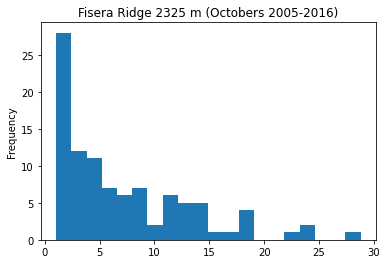

In [254]:
FRPoct_df.FR_dailyoct_p_mm.plot(kind='hist', bins=20)
plt.title('Fisera Ridge 2325 m (Octobers 2005-2016)')

gamma: (0.6021657305012404, 1.0493000000000001, 11.443060389645957)
exponential: (1.0493000000000003, 6.08629494949495)


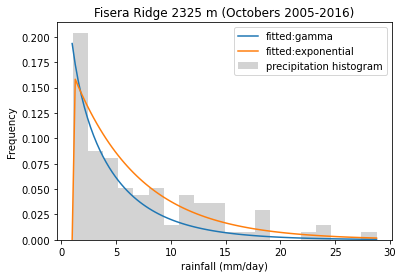

In [257]:
# fit distributions
x = np.linspace(1, max(FRPoct_df.FR_dailyoct_p_mm), 100)
y = FRPoct_df.FR_dailyoct_p_mm
FRPoct_df.FR_dailyoct_p_mm.plot(kind='hist', bins=20, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma distn
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.76, scale=5.25) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# fit exponential distn
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# plotting
plt.xlabel('rainfall (mm/day)')
# plt.xlim(0, 30)
# plt.ylim(0, 0.25)
plt.legend()
plt.title('Fisera Ridge 2325 m (Octobers 2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_monthly_plots_2005-16\FRproboct_1mm_2005-16.png')

### Upper Clearing 1845 m

Text(0.5, 1.0, 'Upper Clearing 1845 m (Octobers 2005-2016)')

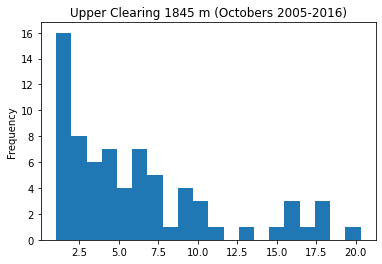

In [258]:
UCPoct_df.UC_dailyoct_p_mm.plot(kind='hist', bins=20)
plt.title('Upper Clearing 1845 m (Octobers 2005-2016)')

gamma: (0.779679370873593, 1.028499999999999, 5.150259419876063)
exponential: (1.0284999999999993, 5.182304166666667)


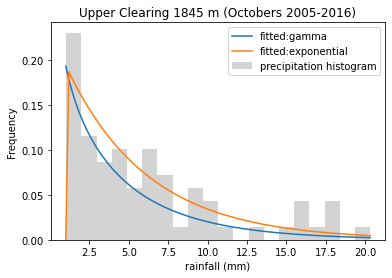

In [259]:
# fit distributions
x = np.linspace(1, max(UCPoct_df.UC_dailyoct_p_mm), 100)
y = UCPoct_df.UC_dailyoct_p_mm
UCPoct_df.UC_dailyoct_p_mm.plot(kind='hist', bins=20, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.76, scale=5.25) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# fit exp
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# plotting
plt.xlabel('rainfall (mm)')
# plt.xlim(0, 40)
# plt.ylim(0, 0.35)
plt.legend()
plt.title('Upper Clearing 1845 m (Octobers 2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_monthly_plots_2005-16\UCproboct_1mm_2005-16.png')

### Kananskis Pocaterra 1610 m, 653 wet days

Text(0.5, 1.0, 'Kananaskis Pocaterra 1610 m (Octobers 2005-2016)')

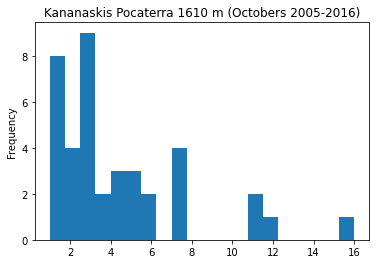

In [260]:
KPPoct_df.KP_dailyoct_p_mm.plot(kind='hist', bins=20)
plt.title('Kananaskis Pocaterra 1610 m (Octobers 2005-2016)')

### **** There was a non-finite value error when fitting gamma and exp distns

In [262]:
# # fit distributions
# x = np.linspace(1, max(KPPoct_df.KP_dailyoct_p_mm), 100)
# y = KPPoct_df.KP_dailyoct_p_mm
# KPPoct_df.KP_dailyoct_p_mm.plot(kind='hist', bins=20, density=True, color='lightgrey', label='precipitation histogram')
# # fit gamma
# param = scipy.stats.gamma.fit(y)
# print("gamma:", param)
# pdf_fitted = scipy.stats.gamma.pdf(x, a=0.76, scale=5.25) # a is shape param
# plt.plot(x, pdf_fitted, label='fitted:gamma')
# # fit exp
# param = scipy.stats.expon.fit(y)
# print("exponential:", param)
# pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
# plt.plot(x, pdf_fitted, label='fitted:exponential')
# # plotting
# plt.xlabel('rainfall (mm)')
# # plt.xlim(0, 40)
# # plt.ylim(0, 0.35)
# plt.legend()
# plt.title('Kananaskis Pocaterra 1610 m (Octobers 2005-2016)')
# # plt.show()
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_monthly_plots_2005-16\KPproboct_1mm_2005-16.png')

### Hay Meadow 1436 m

Text(0.5, 1.0, 'Hay Meadow 1436 m (Octobers 2005-2016)')

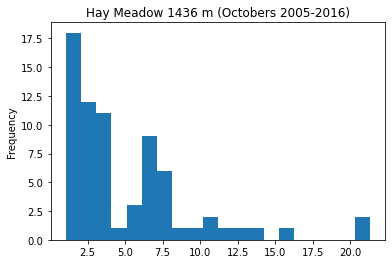

In [263]:
HMPoct_df.HM_dailyoct_p_mm.plot(kind='hist', bins=20)
plt.title('Hay Meadow 1436 m (Octobers 2005-2016)')

gamma: (0.5782600592432731, 1.0457999999999998, 5.591880834469837)
exponential: (1.0458, 4.099794285714285)


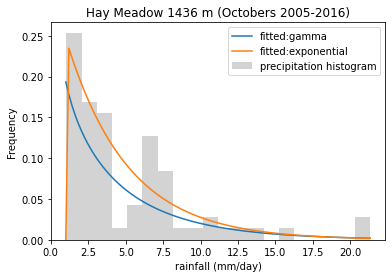

In [264]:
# fit distributions
x = np.linspace(1, max(HMPoct_df.HM_dailyoct_p_mm), 100)
y = HMPoct_df.HM_dailyoct_p_mm
HMPoct_df.HM_dailyoct_p_mm.plot(kind='hist', bins=20, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma distn
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.76, scale=5.25) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# fit exponential distn
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# plotting
plt.xlabel('rainfall (mm/day)')
# plt.xlim(0, 30)
# plt.ylim(0, 0.25)
plt.legend()
plt.title('Hay Meadow 1436 m (Octobers 2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_monthly_plots_2005-16\HMproboct_1mm_2005-16.png')

### Banff CS 1397 m

Text(0.5, 1.0, 'Banff CS 1397 m (Octobers 2005-2016)')

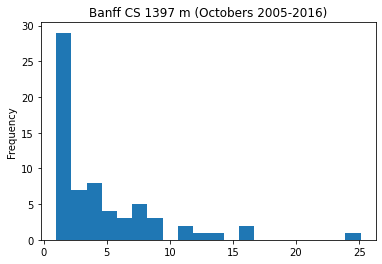

In [265]:
BCSPoct_df.BCS_dailyoct_p_mm.plot(kind='hist', bins=20)
plt.title('Banff CS 1397 m (Octobers 2005-2016)')

### **** There was a non-finite value error when fitting gamma and exp distns

In [168]:
# # fit distributions
# x = np.linspace(1, max(BCSPoct_df.BCS_dailyoct_p_mm), 100)
# y = BCSPoct_df.BCS_dailyoct_p_mm
# BCSPoct_df.BCS_dailyoct_p_mm.plot(kind='hist', bins=20, density=True, color='lightgrey', label='precipitation histogram')
# # fit gamma distn
# param = scipy.stats.gamma.fit(y)
# print("gamma:", param)
# pdf_fitted = scipy.stats.gamma.pdf(x, a=0.76, scale=5.25) # a is shape param
# plt.plot(x, pdf_fitted, label='fitted:gamma')
# # fit exponential distn
# param = scipy.stats.expon.fit(y)
# print("exponential:", param)
# pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
# plt.plot(x, pdf_fitted, label='fitted:exponential')
# # plotting
# plt.xlabel('rainfall (mm/day)')
# plt.xlim(0, 30)
# plt.ylim(0, 0.25)
# plt.legend()
# plt.title('Banff CS 1397 m (Octobers 2005-2016)')
# # plt.show()
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_monthly_plots_2005-16\BCSproboct_1mm_2005-16.png')

### Kananaskis 1391 m

Text(0.5, 1.0, 'Kananaskis 1391 m (Octobers 2005-2016)')

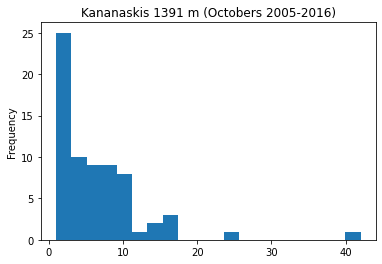

In [266]:
KPoct_df.K_dailyoct_p_mm.plot(kind='hist', bins=20)
plt.title('Kananaskis 1391 m (Octobers 2005-2016)')

gamma: (0.6799080166062834, 0.9999999999999999, 2.1614513857237787)
exponential: (1.0, 5.41304347826087)


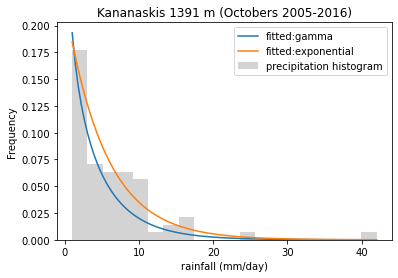

In [267]:
# fit distributions
x = np.linspace(1, max(KPoct_df.K_dailyoct_p_mm), 100)
y = KPoct_df.K_dailyoct_p_mm
KPoct_df.K_dailyoct_p_mm.plot(kind='hist', bins=20, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma distn
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.76, scale=5.25) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# fit exponential distn
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# plotting
plt.xlabel('rainfall (mm/day)')
# plt.xlim(0, 30)
# plt.ylim(0, 0.25)
plt.legend()
plt.title('Kananaskis 1391 m (Octobers 2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_monthly_plots_2005-16\Kproboct_1mm_2005-16.png')

### Bow Valley 1298 m

Text(0.5, 1.0, 'Fisera Ridge 2325 m (Octobers 2005-2016)')

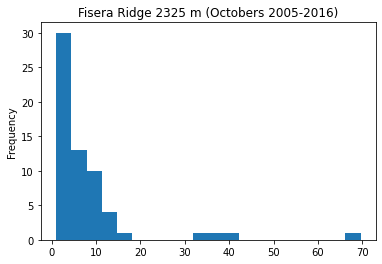

In [268]:
BVPoct_df.BV_dailyoct_p_mm.plot(kind='hist', bins=20)
plt.title('Fisera Ridge 2325 m (Octobers 2005-2016)')

### **** There was a non-finite value error when fitting gamma and exp distns

In [175]:
# # fit distributions
# x = np.linspace(1, max(BVPoct_df.BV_dailyoct_p_mm), 100)
# y = BVPoct_df.BV_dailyoct_p_mm
# BVPoct_df.BV_dailyoct_p_mm.plot(kind='hist', bins=20, density=True, color='lightgrey', label='precipitation histogram')
# # fit gamma distn
# param = scipy.stats.gamma.fit(y)
# print("gamma:", param)
# pdf_fitted = scipy.stats.gamma.pdf(x, a=0.76, scale=5.25) # a is shape param
# plt.plot(x, pdf_fitted, label='fitted:gamma')
# # fit exponential distn
# param = scipy.stats.expon.fit(y)
# print("exponential:", param)
# pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
# plt.plot(x, pdf_fitted, label='fitted:exponential')
# # plotting
# plt.xlabel('rainfall (mm/day)')
# # plt.xlim(0, 30)
# # plt.ylim(0, 0.25)
# plt.legend()
# plt.title('Bow Valley 1298 m (Octobers 2005-2016)')
# # plt.show()
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_monthly_plots_2005-16\BVproboct_1mm_2005-16.png')

### Wildcat Hills 1268 m

Text(0.5, 1.0, 'Wildcat Hills 1268 m (Octobers 2005-2016)')

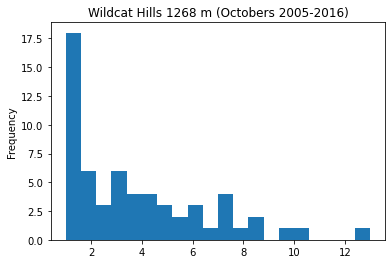

In [269]:
WHPoct_df.WH_dailyoct_p_mm.plot(kind='hist', bins=20)
plt.title('Wildcat Hills 1268 m (Octobers 2005-2016)')

### **** There was a non-finite value error when fitting gamma and exp distns

In [178]:
# # fit distributions
# x = np.linspace(1, max(WHPoct_df.WH_dailyoct_p_mm), 100)
# y = WHPoct_df.WH_dailyoct_p_mm
# WHPoct_df.WH_dailyoct_p_mm.plot(kind='hist', bins=20, density=True, color='lightgrey', label='precipitation histogram')
# # fit gamma distn
# param = scipy.stats.gamma.fit(y)
# print("gamma:", param)
# pdf_fitted = scipy.stats.gamma.pdf(x, a=0.76, scale=5.25) # a is shape param
# plt.plot(x, pdf_fitted, label='fitted:gamma')
# # fit exponential distn
# param = scipy.stats.expon.fit(y)
# print("exponential:", param)
# pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
# plt.plot(x, pdf_fitted, label='fitted:exponential')
# # plotting
# plt.xlabel('rainfall (mm/day)')
# # plt.xlim(0, 30)
# # plt.ylim(0, 0.25)
# plt.legend()
# plt.title('Wildcat Hills 1268 m (Octobers 2005-2016)')
# # plt.show()
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_monthly_plots_2005-16\WHproboct_1mm_2005-16.png')